# Clustering and Manifold Learning  

Name: Darren King
Student_ID: 17145031

In [602]:
import random
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import time
from sklearn.cluster import KMeans
from sklearn.manifold import Isomap
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.manifold import TSNE
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.cluster import DBSCAN


In [603]:
# Load in the dataset 

df = pd.read_csv("./loans_train_prepared-1.csv")
df.drop(labels="Loan_Status_Y", axis=1, inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dependents               614 non-null    float64
 1   ApplicantIncome          614 non-null    float64
 2   LoanAmount               614 non-null    float64
 3   Loan_Amount_Term         614 non-null    float64
 4   Credit_History           614 non-null    int64  
 5   Gender_Male              614 non-null    int64  
 6   Gender_nan               614 non-null    int64  
 7   Married_Yes              614 non-null    int64  
 8   Married_nan              614 non-null    int64  
 9   Self_Employed_Yes        614 non-null    int64  
 10  Self_Employed_nan        614 non-null    int64  
 11  Education_Not Graduate   614 non-null    int64  
 12  Property_Area_Semiurban  614 non-null    int64  
 13  Property_Area_Urban      614 non-null    int64  
 14  TotalIncome              6

In [604]:
print(df.describe())

       Dependents  ApplicantIncome  LoanAmount  Loan_Amount_Term  \
count  614.000000       614.000000  614.000000        614.000000   
mean     0.248100         0.916588    1.076222          0.713355   
std      0.336541         0.412366    0.338744          0.134226   
min      0.000000         0.004634    0.005026          0.025000   
25%      0.000000         0.662440    0.883668          0.750000   
50%      0.000000         0.815365    1.047319          0.750000   
75%      0.333333         1.078246    1.229571          0.750000   
max      1.000000         3.357480    2.461145          1.000000   

       Credit_History  Gender_Male  Gender_nan  Married_Yes  Married_nan  \
count      614.000000   614.000000  614.000000   614.000000   614.000000   
mean         0.855049     0.796417    0.021173     0.648208     0.004886   
std          0.352339     0.402991    0.144077     0.477919     0.069786   
min          0.000000     0.000000    0.000000     0.000000     0.000000   
25%    

In [605]:
# Are ApplicantIncome, LoanAmount and TotalIncome appropriately scaled? Consider rescaling these attributes.
# Based on the desriptor I feel the attributes have already been scaled and thus no further scaling is required.
scaler = StandardScaler()

In [606]:
print(df.head())

   Dependents  ApplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0    0.000000         1.084523    1.058140              0.75               1   
1    0.333333         0.925883    1.047319              0.75               1   
2    0.000000         0.683858    0.635920              0.75               1   
3    0.000000         0.608992    1.002824              0.75               1   
4    0.000000         1.101869    1.115650              0.75               1   

   Gender_Male  Gender_nan  Married_Yes  Married_nan  Self_Employed_Yes  \
0            1           0            0            0                  0   
1            1           0            1            0                  0   
2            1           0            1            0                  1   
3            1           0            1            0                  0   
4            1           0            0            0                  0   

   Self_Employed_nan  Education_Not Graduate  Property_Area_Semiurba

In [607]:
# Load data into a numpy array - (or just use the data as is in a dataframe?)
data = np.array(df.values)
print('Number of samples:', data.shape[0])
print('Number of attributes/features per sample:', data.shape[1])

Number of samples: 614
Number of attributes/features per sample: 15


We don't need to concern ourselves with casting everything to a 64 bit float or a 64 bit integer.

# Task 2

##  K-Means Clustering

Plot the sum of squared distances from the data points to the centres of the k-means clusters for various values of k. Use the Elbow method to pick the best value for k. Attempt also another method for determining the best value for k. Use the best value(s) of k to cluster the dataset with k-means. Aim at producing meaning clustering.

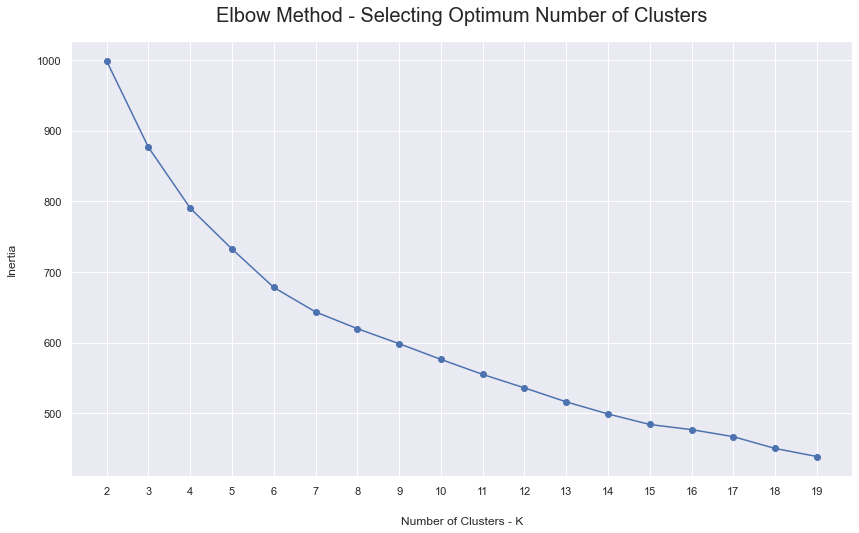

In [608]:
inertia_list = []
k_range = range(2,20)

for k in k_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(data)
    inertia_list.append(model.inertia_)

plt.figure(figsize=(14,8))
plt.plot(k_range, inertia_list, marker = 'o')
plt.title('Elbow Method - Selecting Optimum Number of Clusters', pad=20, fontdict={'fontsize':20})
plt.xticks(k_range)
plt.xlabel('Number of Clusters - K', labelpad=20)
plt.ylabel('Inertia', labelpad=20)
plt.show()

Use the Silhouette method to pick the best value for k.

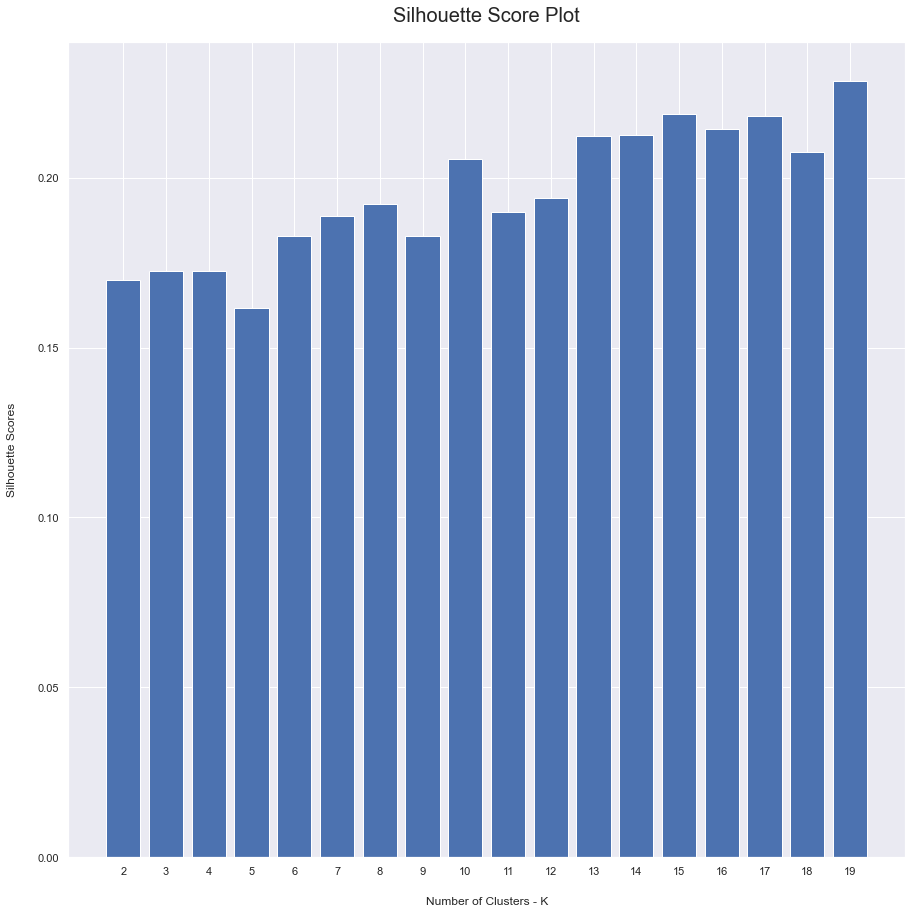

In [609]:
score_list = []

for k in k_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(data)
    pred=model.predict(data)
    score = silhouette_score(data,pred,metric='euclidean')
    score_list.append(score)

plt.bar(k_range, score_list)
plt.title("Silhouette Score Plot", pad=20, fontdict={'fontsize':20})
plt.xticks(k_range)
plt.xlabel('Number of Clusters - K', labelpad=20)
plt.ylabel('Silhouette Scores', labelpad=20)
plt.show()

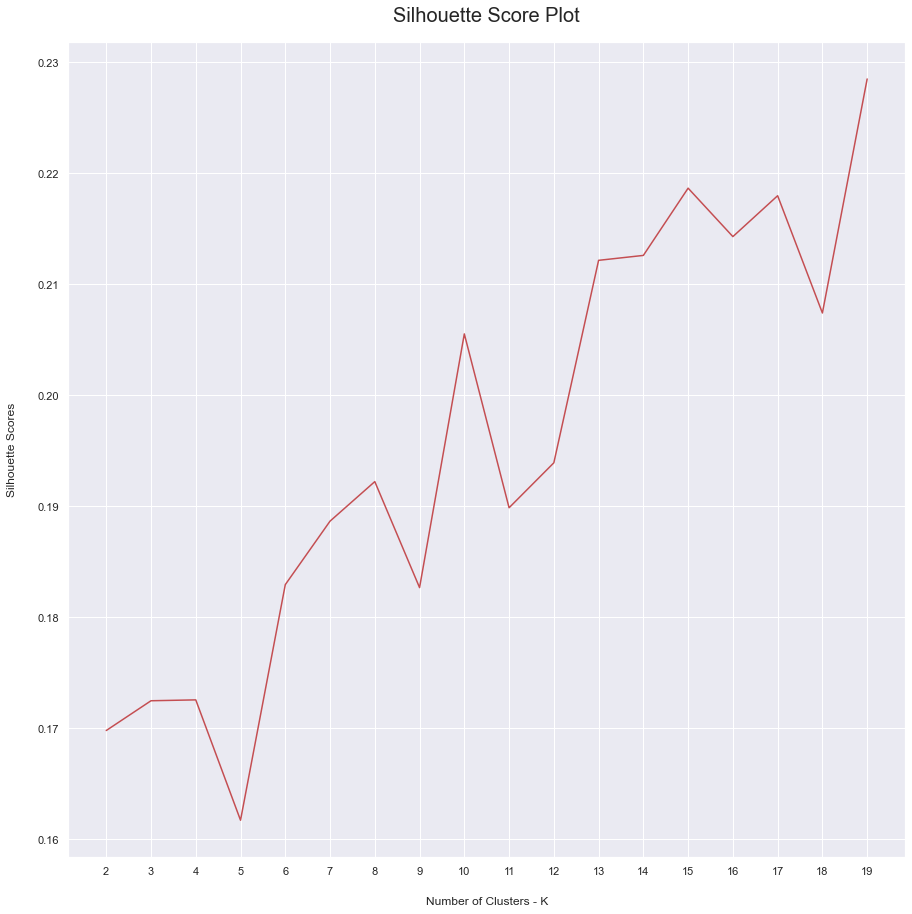

In [610]:
plt.plot(k_range, score_list, 'r')
plt.title("Silhouette Score Plot", pad=20, fontdict={'fontsize':20})
plt.xticks(k_range)
plt.xlabel('Number of Clusters - K', labelpad=20)
plt.ylabel('Silhouette Scores', labelpad=20)
plt.show()

The average silhouette score for 3 clusters is: 0.17248931657789227
The average silhouette score for 4 clusters is: 0.1725685005158776
The average silhouette score for 5 clusters is: 0.16172527086217786
The average silhouette score for 6 clusters is: 0.18294948045015383
The average silhouette score for 7 clusters is: 0.18867021217480567
The average silhouette score for 8 clusters is: 0.192231991928635
The average silhouette score for 9 clusters is: 0.18268175139898107
The average silhouette score for 10 clusters is: 0.205538437649214
The average silhouette score for 11 clusters is: 0.18987602052392152
The average silhouette score for 12 clusters is: 0.19392553720189357


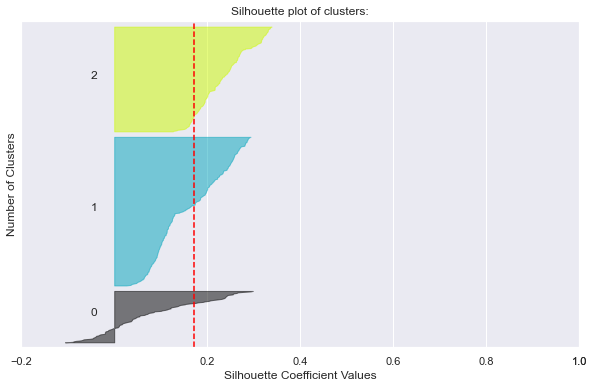

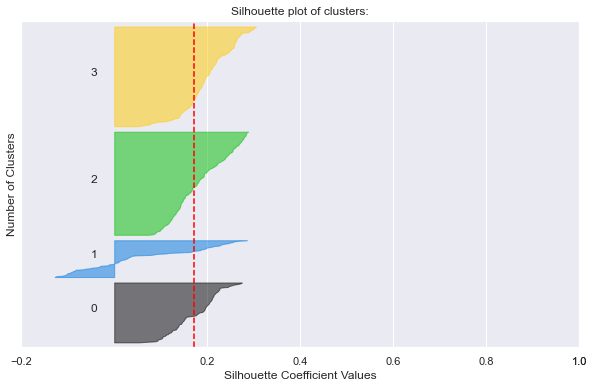

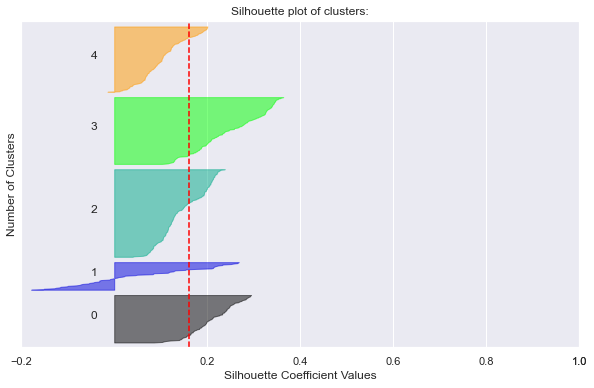

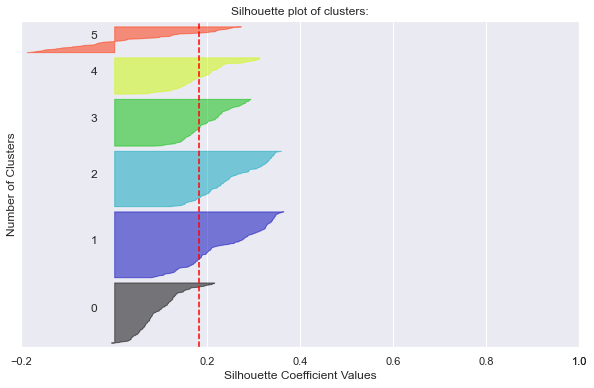

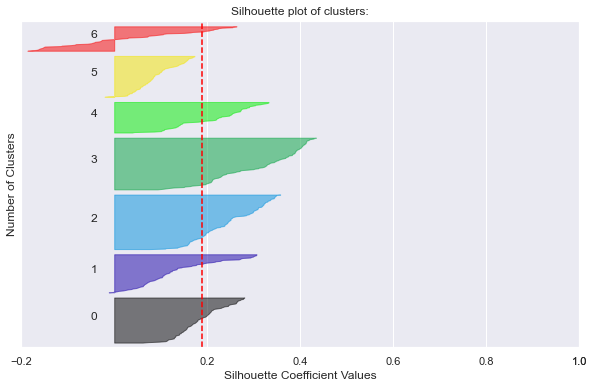

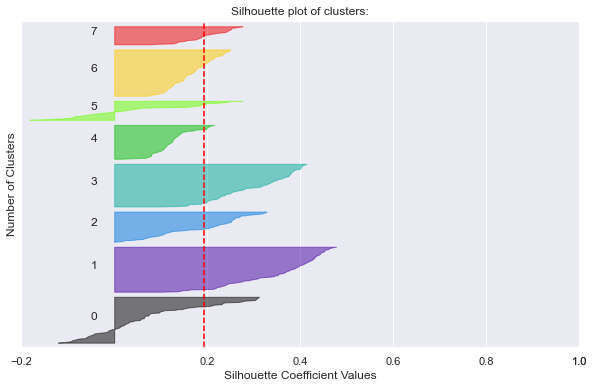

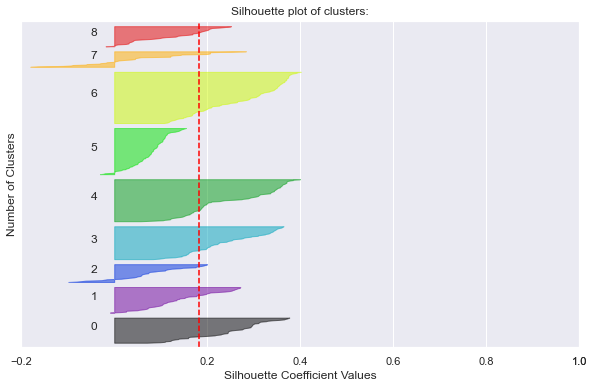

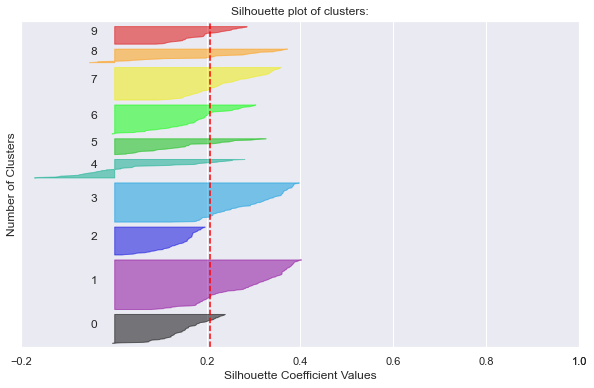

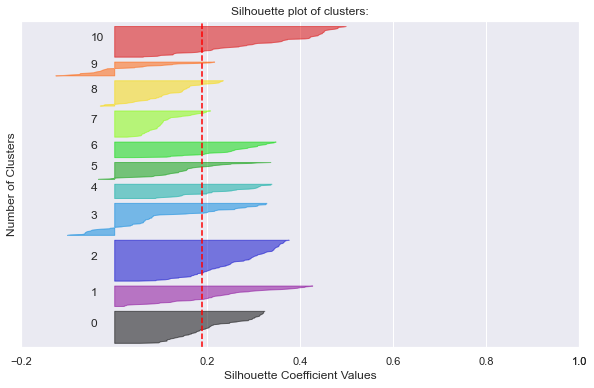

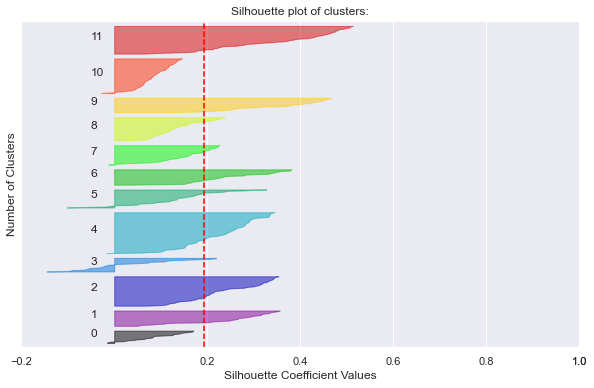

In [611]:
range_n_clusters = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

for n_clusters in range_n_clusters:

    fig, ax = plt.subplots()

    fig.set_size_inches(10,6)

    # Silhouette plot
    ax.set_xlim([-0.2,1])
    ax.set_ylim([0, len(data) + (n_clusters + 1)*10])

    model = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = model.fit_predict(data)

    silhouette_average = silhouette_score(data,cluster_labels)
    print("The average silhouette score for " + str(n_clusters) + " clusters is: " + str(silhouette_average))

    sample_silhouette_values = silhouette_samples(data, cluster_labels) # Computing silhouette coefficient for each sample
    # this is a measure of how well samples are clustered with samples similar to themselves; the best value is 1 and the
    # worst value is -1 - values of 0 indicate overlapping clusters

    y_lower = 10
    for i in range(n_clusters):

        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        colour = cm.nipy_spectral(float(i)/n_clusters)
        ax.fill_betweenx(
            np.arange(y_lower,y_upper),
            0,ith_cluster_silhouette_values,
            facecolor = colour,
            edgecolor = colour,
            alpha=0.5
        )

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # labelling the silhouetter

        y_lower = y_upper + 10

    ax.set_title("Silhouette plot of clusters:")
    ax.set_xlabel("Silhouette Coefficient Values")
    ax.set_ylabel("Number of Clusters")

    ax.axvline(x=silhouette_average, color="red", linestyle="--")

    ax.set_yticks([])
    ax.set_xticks([-0.2, 1, 0.2, 0.4, 0.6, 0.8, 1.0])


plt.show()

We don't have a clear bend in the elbow method; we have the values [6,7,8,9,10,11]. By silhouette scoring 10 appears to have the highest score before we climb into higher clustering values. The average silhouette score for 10 clusters is 0.2 which is only marginally better than the other cluster scores.

In [612]:
# Define our model and fit our model to our data
k = 10
model = KMeans (n_clusters=k, init='k-means++', n_init=15, max_iter=200, random_state=42)
model_data = model.fit(data)

# Extracting the centroids from the fitted data within the model - before dimensionality reduction
centroids = model_data.cluster_centers_
# Extracting the labels from the fitted data within the model - before dimensionality reduction
labels = model_data.labels_
# Appending the centroids to the original dataset
data_and_centres = np.r_[data, centroids]

In [613]:
# Reduce the 16 dimensions to a 2-dimensional or 3-dimensional space through manifold learning
# Linear dimensionality reduction techniques such as PCA are not great for non-linear data

In [614]:
# Isomap - Isometric Mapping - extending upon Kernel PCA or MDS (Multi-Dimensional Scaling)
# Maintains geodesic distances between all points
isomap_embedding_model = Isomap(n_components=2) #Bring the data down to 2-dimensions

embedded_data_and_centroids = isomap_embedding_model.fit_transform(data_and_centres)

embedded_data = embedded_data_and_centroids[:-k,:]
embedded_centroids = embedded_data_and_centroids[-k:,:]

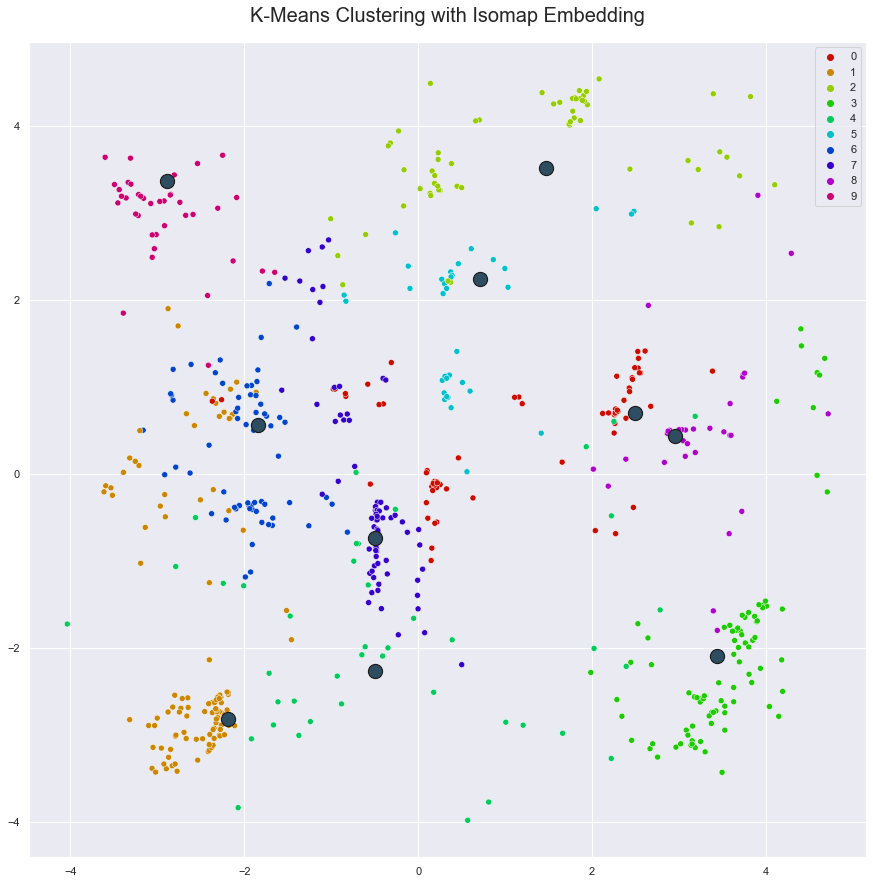

In [615]:
# Graphing our output
sns.set(rc={"figure.figsize":(15,15)})
palette = sns.hls_palette(len(set(labels)), l=0.4, s=1.0)
sns.scatterplot(x=embedded_data[:,0], y=embedded_data[:,1], hue=labels, legend='full', palette=palette)
sns.scatterplot(x=embedded_centroids[:,0], y=embedded_centroids[:,1], color="#2f4d61", s=200, marker="o", alpha=1, edgecolor='k')
plt.title("K-Means Clustering with Isomap Embedding", pad=20, fontdict={'fontsize':20})
plt.show()

Here I've used an Isomap embedding for dimensionality reduction purposes. When I went with a cluster-k value of 8 the clusters weren't very evident. As such I went back and did some more analysis of the elbow and silhouette methods above and changed to a value of 10. The clusters are more evident now but not as evident as is the case with the use of t-SNE below.
Isomap embedding is typically used to discover the non-linear degrees of freedom that underlie complex natural observations including human handwriting and facial images. Isomap efficiently computes a globally optimum solution. Is this the reason that the clusters aren't as evident - local associations are lost in preservation of the overall global structure? TSNE allows for greater control of this through its perplexity hyperparameter.

In [616]:
tsne_model = TSNE(verbose=1, perplexity=10)

embedded_data_and_centroids = tsne_model.fit_transform(data_and_centres)

embedded_data = embedded_data_and_centroids[:-k,:]
embedded_centroids = embedded_data_and_centroids[-k:,:]

/Users/darrenking/miniforge3/envs/env_ml/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/darrenking/miniforge3/envs/env_ml/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 624 samples in 0.000s...
[t-SNE] Computed neighbors for 624 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 624 / 624
[t-SNE] Mean sigma: 0.323946
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.755165
[t-SNE] KL divergence after 1000 iterations: 0.487509


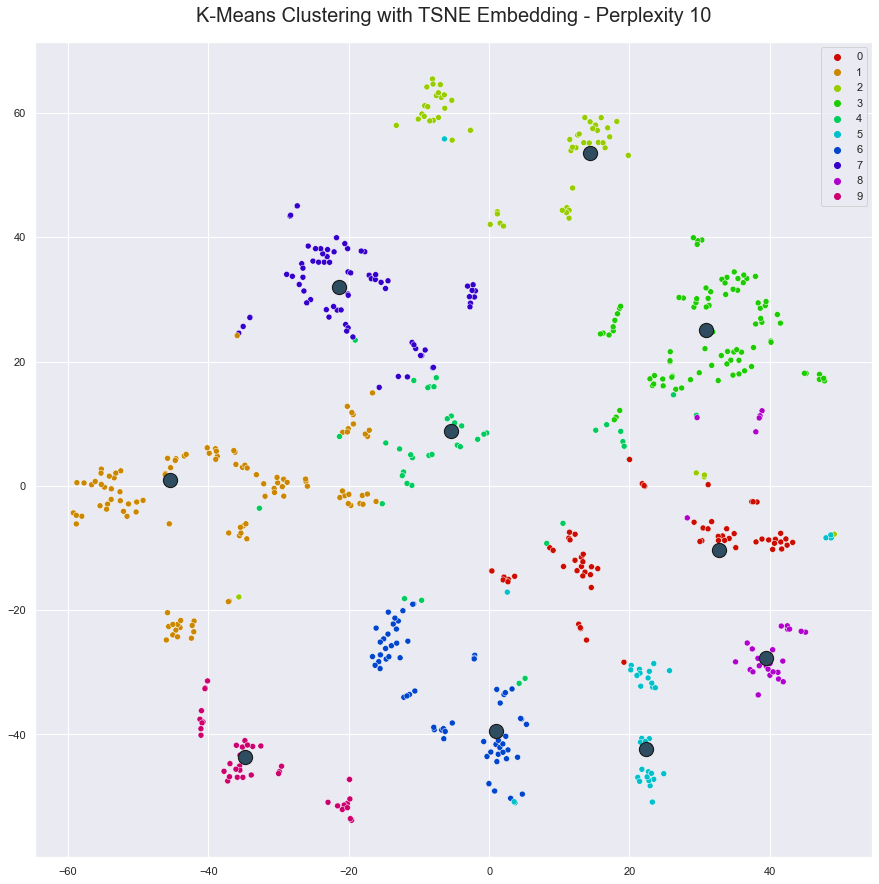

In [617]:
# Graphing our output
sns.set(rc={"figure.figsize":(15,15)})
palette = sns.hls_palette(len(set(labels)), l=0.4, s=1.0)
sns.scatterplot(x=embedded_data[:,0], y=embedded_data[:,1], hue=labels, legend='full', palette=palette)
sns.scatterplot(x=embedded_centroids[:,0], y=embedded_centroids[:,1], color="#2f4d61", s=200, marker="o", alpha=1, edgecolor='k')
plt.title("K-Means Clustering with TSNE Embedding - Perplexity 10", pad=20, fontdict={'fontsize':20})
plt.show()

With TSNE our embeddings are more evident, but we still have evident outliers in the majority of our clusters. Unlike Isomap embedding, TSNE tends to be sensitive to local structures within the data and will tend to extract clustered local groups of data. By altering the perplexity of the TSNE we can tune the number of local versus global points within clusters.  UMAP is an improvement on the TSNE dimensionality reduction technique but utilises an older version of Numpy (as required by Numba) but it works very well in terms of dimensionality reduction.

In [618]:
# Can we visualise the above using a

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 624 samples in 0.000s...


/Users/darrenking/miniforge3/envs/env_ml/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/darrenking/miniforge3/envs/env_ml/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 624 samples in 0.013s...
[t-SNE] Computed conditional probabilities for sample 624 / 624
[t-SNE] Mean sigma: 0.529638
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.599060
[t-SNE] KL divergence after 1000 iterations: 0.529342


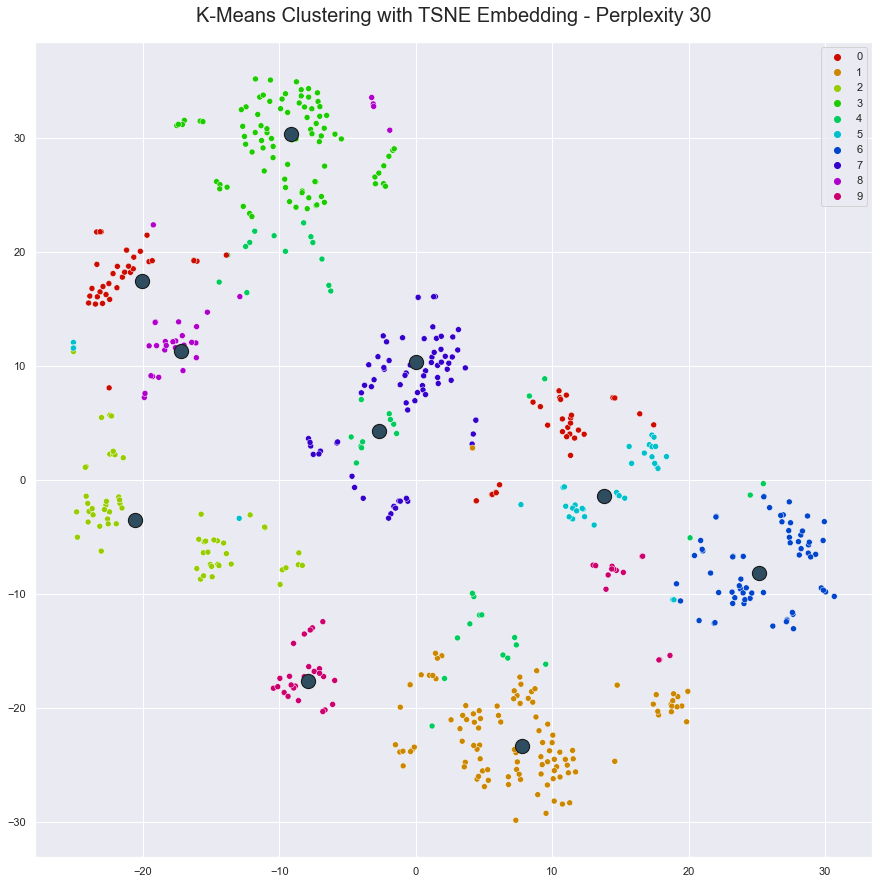

In [619]:
tsne_model = TSNE(verbose=1, perplexity=30)

embedded_data_and_centroids = tsne_model.fit_transform(data_and_centres)

embedded_data = embedded_data_and_centroids[:-k,:]
embedded_centroids = embedded_data_and_centroids[-k:,:]

# Graphing our output
sns.set(rc={"figure.figsize":(15,15)})
palette = sns.hls_palette(len(set(labels)), l=0.4, s=1.0)
sns.scatterplot(x=embedded_data[:,0], y=embedded_data[:,1], hue=labels, legend='full', palette=palette)
sns.scatterplot(x=embedded_centroids[:,0], y=embedded_centroids[:,1], color="#2f4d61", s=200, marker="o", alpha=1, edgecolor='k')
plt.title("K-Means Clustering with TSNE Embedding - Perplexity 30", pad=20, fontdict={'fontsize':20})
plt.show()

With smaller perplexities local variations dominate over more global variations in the data. For this dataset I feel that the local variations lend themselves to better clustering and therefore favour a lower perplexity. This is worth considering when I explore DBSCAN with TSNE below.

# Task 3


Use another clustering algorithm and an appropriate manifold-learning technique to visualise it.
Discuss the differences between the K-Means clustering and the clustering found by the second algorithm you have tried in words and by visualising the clusterings with an appropriate manifold learning technique.

/Users/darrenking/miniforge3/envs/env_ml/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/darrenking/miniforge3/envs/env_ml/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/darrenking/miniforge3/envs/env_ml/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/darrenking/miniforge3/envs/env_ml/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/darrenking/miniforge3/envs/env_ml/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change

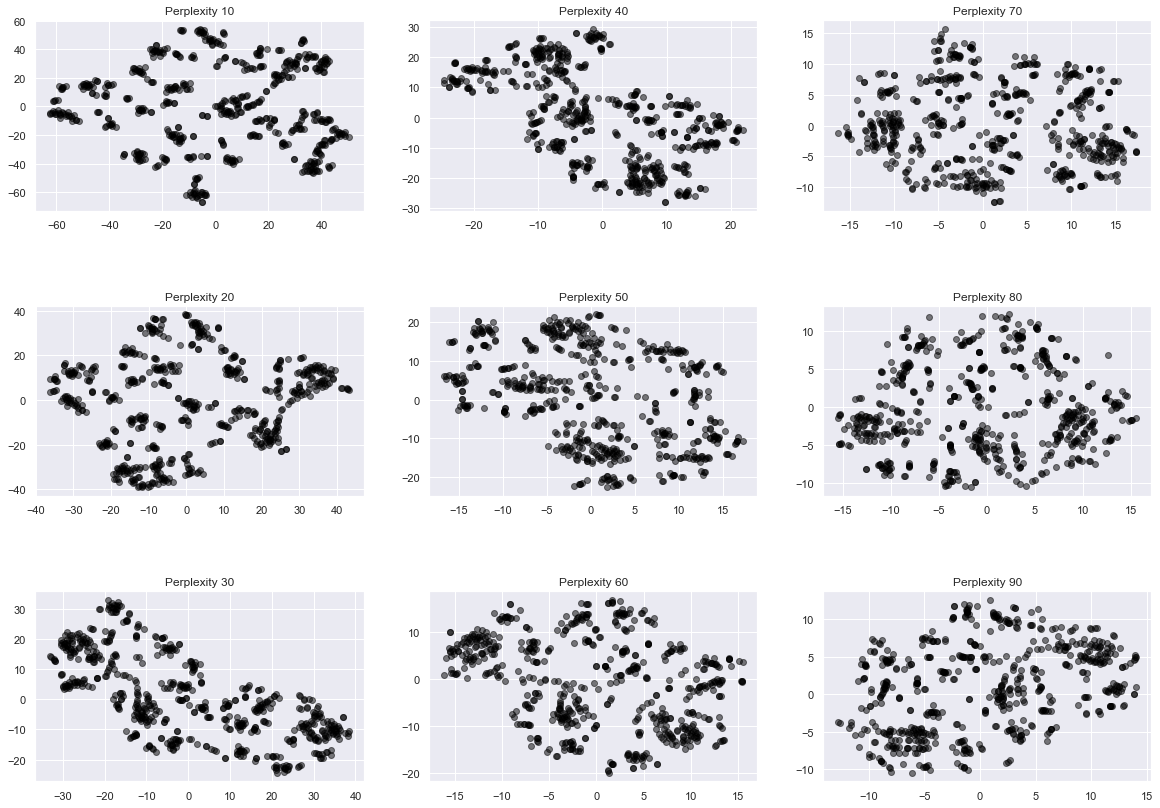

In [620]:
# Using t-SNE for dimensionality reduction - tune the perplexity hyperparameter

perplexity_list = [10,20,30,40,50,60,70,80,90]

fig, ax = plt.subplots(3,3,figsize = (20,14))
plt.subplots_adjust(hspace=0.5)

# tune the perplexity hyperparameter

for i, perplexity in enumerate(perplexity_list):
    tsne = TSNE(n_components=2, perplexity=perplexity)
    tsne_fit = tsne.fit_transform(data)

    ax[i%3][math.floor(i/3)].set_title(f'Perplexity {perplexity}')
    ax[i%3][math.floor(i/3)].scatter(tsne_fit[:,0], tsne_fit[:,1], color='black', alpha=0.5)

From the above it's very difficult to discern potential clusters of data in any of the varying perplexities. DBSCAN can be very effective at dealing with outliers in data. Unfortunately it's hard to visualise clusters above, never-mind outliers. As such, I'm inclined to go with a perplexity of 10 as this worked effectively with KMeans above.

In [629]:
tsne = TSNE(n_components=2, perplexity=10)
tsne_embedded_data = tsne.fit_transform(data)

/Users/darrenking/miniforge3/envs/env_ml/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/darrenking/miniforge3/envs/env_ml/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


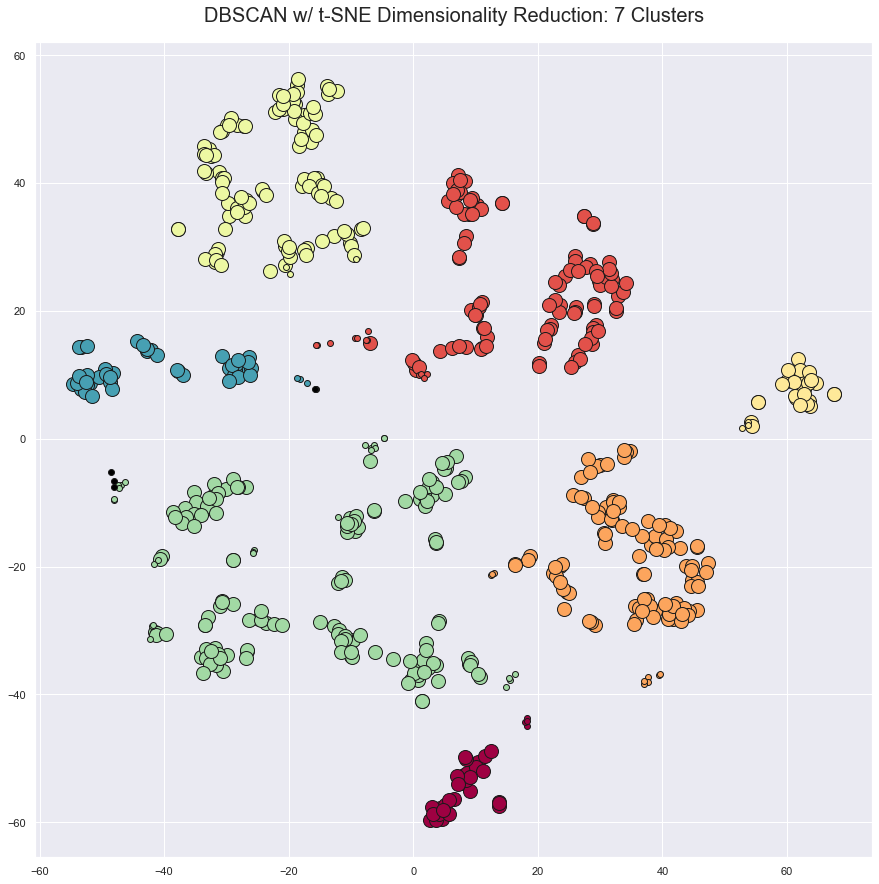

In [650]:
# Using DBSCAN we have 2 hyper-parameters worth considering
# eps - sets the radius that a cluster can look for neighbour points
# min_samp defines the min number of points within the eps range required to qualify as a cluster
# If min_samples is too small clusters from noise will form so set it to at least the number of features
# in your data.

# Create a model
dbscan_model = DBSCAN(eps=10, min_samples=15).fit(tsne_embedded_data)
# Create a numpy array of booleans based on the cluster labels - remember noisy samples are given the label -1 so false
core_samples_mask = np.zeros_like(dbscan_model.labels_, dtype=bool)
core_samples_mask[dbscan_model.core_sample_indices_] = True

labels = dbscan_model.labels_

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

#Create a set of unique labels
unique_labels = set(labels)
colours = [cm.Spectral(each) for each in np.linspace(0,1,len(unique_labels))]

for k, col in zip(unique_labels, colours):
    if k == -1:
        col = [0,0,0,1]
    class_member_mask = labels == k

    xy = tsne_embedded_data[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor='k',
        markersize=14,
    )

    xy = tsne_embedded_data[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor='k',
        markersize=6,
    )
plt.title("DBSCAN w/ t-SNE Dimensionality Reduction: " + str(n_clusters) + " Clusters", pad=20, fontdict={'fontsize':20})
plt.show()


In [656]:
dbscan_model = DBSCAN(eps=10, min_samples=15).fit(tsne_embedded_data)
kmeans_model = KMeans (n_clusters=10, init='k-means++', n_init=15, max_iter=200, random_state=42).fit(data)

In [657]:
print('kmeans: {}'.format(silhouette_score(data, kmeans_model.labels_, metric='euclidean')))
print('DBSCAN: {}'.format(silhouette_score(data, dbscan_model.labels_, metric='cosine')))

kmeans: 0.205538437649214
DBSCAN: 0.14456903101258892


Above, we have use both K-Means and DBSCAN clustering algorithms with t-SNE dimensionality reduction. K-Means is a much more easily implemented algorithm however it is predicated, as an unsupervised algorithm with unlabelled data, on a single value, k. Determining the appropriate value for k can prove a somewhat trial and error task but this can be mitigated through the use of the elbow or silhouette method as demonstrated above.
DBSCAN uses a density based approach to dimensionality reduced data. There are two main hyper-parameters that have to be considered when we are using DBSCAN, namely eps which is the maximum distance between 2 samples for them to be considered to be within the same cluster. By increasing the eps value you will cause a reduction in the number of clusters and fine tuning this parameter can alter the number of parameters drastically. Simply increasing the eps from 10 to 11 brings the number of clusters from 7 to 4. min_samp defines the min number of points within the eps range required to qualify as a cluster. If min_samples is too small clusters from noise will form so set it to at least the number of features in your data.